# Installing image-classifiers on Colab

In [2]:
!pip install git+https://github.com/qubvel/classification_models.git

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Cloning https://github.com/qubvel/classification_models.git to /tmp/pip-req-build-objr_9pe
  Running command git clone -q https://github.com/qubvel/classification_models.git /tmp/pip-req-build-objr_9pe
  Running command git submodule update --init --recursive -q
     |████████████████████████████████| 50 kB 3.1 MB/s 
  Created wheel for image-classifiers: filename=image_classifiers-1.0.0-py3-none-any.whl size=20046 sha256=4ba268162b9777e10db8ce9170aa7e423d01d08876ed29d96a998a692860a4c0
  Stored in directory: /tmp/pip-ephem-wheel-cache-jitc2a5_/wheels/0b/96/56/27b17c903efc647c51e4f364bfc20aa67f8d3dccad63c4fb4e
Successfully built image-classifiers


# Import Dependencies

In [3]:
import numpy as np
import keras
import matplotlib.pyplot as plt
from keras.datasets import cifar10
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPooling2D
from keras.layers import Dropout, Flatten, GlobalAveragePooling2D
# from classification_models.resnet import ResNet18, preprocess_input
from keras.applications.resnet import ResNet50, preprocess_input
import keras.backend as K
import shutil, os
from google.colab.patches import cv2_imshow
import cv2

# Preparing data

In [4]:
# prepare your data
(X_train, y_train), (X_test, y_test) = cifar10.load_data() 
X_train.shape, X_test.shape, np.unique(y_train).shape[0]
# one-hot encoding
n_classes = 10
y_train = np_utils.to_categorical(y_train, n_classes)
y_test = np_utils.to_categorical(y_test, n_classes)

170508288/170498071 [==============================] - 6s 0us/step


In [5]:
classname = {
    0: 'airplane',
    1: 'automobile',
    2: 'bird',
    3: 'cat',
    4: 'deer',
    5: 'dog',
    6: 'frog',
    7: 'horse',
    8: 'ship',
    9: 'truck',
}

# Visualisation of CIFAR-10 images

Shape of each image in the training data:  (32, 32, 3)


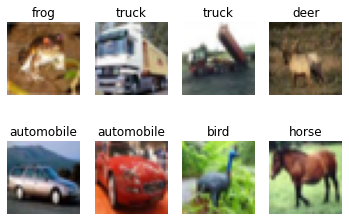

In [6]:
for i in range(1, 9):
    img = X_train[i-1]
    plt.subplot(2, 4, i)
    plt.imshow(img)
    plt.axis('off')
    plt.title(classname[np.argmax(y_train[i-1])])

print("Shape of each image in the training data: ", X_train.shape[1:])

# Transfer learning on ResNet18 and training for 10 epochs on Cifar-10

In [43]:
from keras.models import Sequential
from keras.layers import Dense, Activation, Flatten, Dropout
from keras.layers import Conv2D, MaxPooling2D, BatchNormalization

n_classes = 10

model = Sequential()
# Layer 1
model.add(Conv2D(filters=32,input_shape=(32,32,3), activation='relu', padding='same', kernel_size=(3,3),name='conv1'));
model.add(BatchNormalization())
# Layer 2
model.add(Conv2D(filters=32, activation='relu', padding='same',  kernel_size=(3,3),name='conv2'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),padding='valid'))
model.add(Dropout(0.2))
# Layer 3
model.add(Conv2D(filters=64, activation='relu', padding='same', kernel_size=(3,3),name='conv3'))
model.add(BatchNormalization())
# Layer 4
model.add(Conv2D(filters=64, activation='relu', padding='same',  kernel_size=(3,3),name='conv4'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.3))
# Layer 5
model.add(Conv2D(filters=128, activation='relu', padding='same',  kernel_size=(3,3),name='conv5'))
model.add(BatchNormalization())
# Layer 6
model.add(Conv2D(filters=128, activation='relu', padding='same', kernel_size=(3,3),name='conv6'))
model.add(BatchNormalization())
model.add(Dropout(0.4))

# 1차원 데이터(FC)으로 변형
model.add(Flatten())
# 밀집층 -> 이미지의 공간 정보 유지 (units: 노드 개수)
model.add(Dense(units=128, activation='relu',name='fc1'))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(units=64, activation='relu',name='fc2'))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(units=10,activation='softmax',name='output'))

# training
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])  

model.fit(X_train, y_train, epochs=10, batch_size=64, validation_data=(X_test, y_test), verbose=1)

Train on 50000 samples, validate on 10000 samples
Epoch 1/10
50000/50000 [==============================] - ETA: 0s - loss: 1.7887 - accuracy: 0.3809

/usr/local/lib/python3.7/dist-packages/keras/engine/training_v1.py:2057: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  updates = self.state_updates


50000/50000 [==============================] - 28s 563us/sample - loss: 1.7887 - accuracy: 0.3809 - val_loss: 1.2607 - val_accuracy: 0.5514
Epoch 2/10
50000/50000 [==============================] - 17s 348us/sample - loss: 1.2024 - accuracy: 0.5767 - val_loss: 1.1411 - val_accuracy: 0.6023
Epoch 3/10
50000/50000 [==============================] - 17s 347us/sample - loss: 0.9989 - accuracy: 0.6607 - val_loss: 0.8685 - val_accuracy: 0.6999
Epoch 4/10
50000/50000 [==============================] - 17s 348us/sample - loss: 0.8691 - accuracy: 0.7073 - val_loss: 0.7583 - val_accuracy: 0.7393
Epoch 5/10
50000/50000 [==============================] - 18s 364us/sample - loss: 0.7877 - accuracy: 0.7375 - val_loss: 0.7732 - val_accuracy: 0.7383
Epoch 6/10
50000/50000 [==============================] - 17s 349us/sample - loss: 0.7238 - accuracy: 0.7616 - val_loss: 0.7152 - val_accuracy: 0.7554
Epoch 7/10
50000/50000 [==============================] - 17s 346us/sample - loss: 0.6682 - accuracy: 0.7

# Evaluating Model

In [23]:
model.evaluate(X_test,y_test)

[1.2733241963386535, 0.5356]

# Collecting misclassified images in test dataset

In [24]:
# actual = np.argmax(y_test, axis=1)
# prediction=[]
# accuracy=[]
# # TruePred=[]
# incorrect_pred = []
# correct_pred = []
# incorrect_class = []
# predictions = []
# actuals = []

# for idx, val in enumerate(X_test):
#   val = np.expand_dims(val, axis=0)
#   pred = model.predict(val)
#   predicted_value = np.argmax(pred, axis=1)
#   prediction.append(predicted_value)
#   accuracy.append(np.amax(pred, axis=1)*100)
#   if actual[idx] != predicted_value:
#       incorrect_pred.append(idx)
#       predictions.append(int(predicted_value))
#       actuals.append(int(actual[idx]))
#   else:
#       correct_pred.append(idx)

/usr/local/lib/python3.7/dist-packages/keras/engine/training_v1.py:2079: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  updates=self.state_updates,


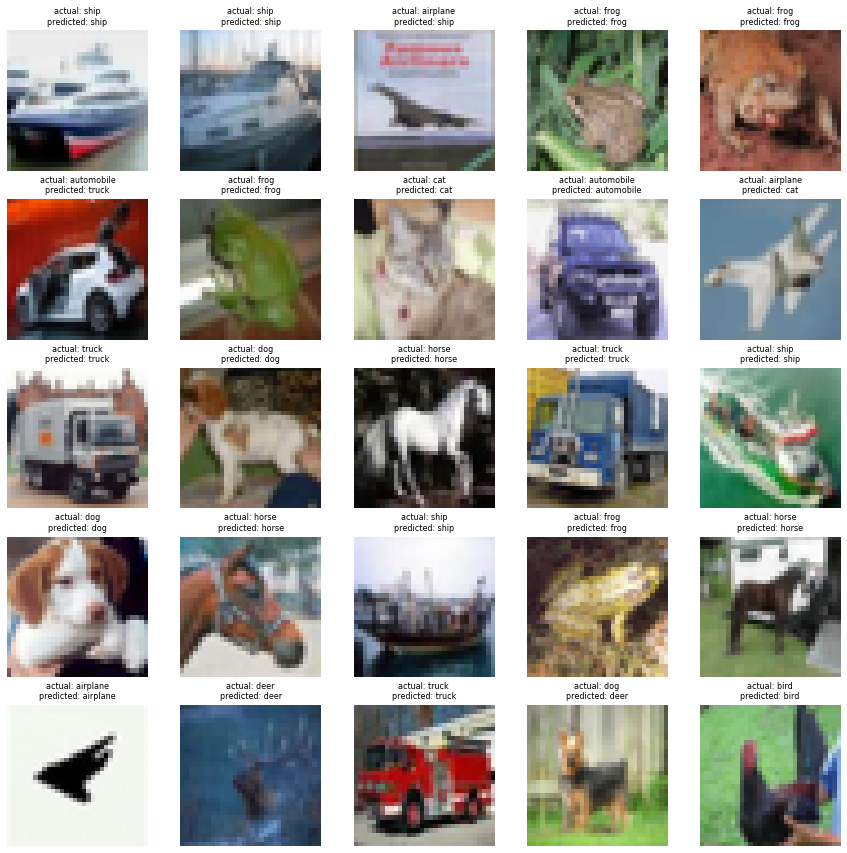

In [65]:
pred = model.predict(X_test)
# print(np.argmax(pred[0]))
plt.figure(figsize=(15,15))
for i in range(1,26):
    img = X_test[i]
    pred_y = np.argmax(pred[i])
    actual = np.argmax(y_test[i])

    plt.subplot(5,5,i)
    plt.imshow(img)
    plt.axis('off')
    # print(y_test[i])
    plt.title("actual: %s\npredicted: %s" % (classname[actual], classname[pred_y]), fontsize=8)

# Helper Function

In [66]:
def process_image(idx_image):
  x = X_test[idx_image]
  x = np.expand_dims(x, axis=0)
  x = preprocess_input(x)
  return x  

In [67]:
# misclassified = incorrect_pred[:50]
# len(misclassified)

50

In [74]:
pred = model.predict(X_test)

[1.3866228e-04 3.8570708e-03 4.7834033e-06 9.2696419e-06 3.0819215e-06
 2.1191472e-06 1.7360866e-05 2.2320053e-06 9.9522614e-01 7.3927647e-04]


# Applying Grad-CAM on 50 misclassified images

In [ ]:
import tensorflow as tf

counter = 0
for index, value in enumerate(X_test):
  if counter < 50:
    x = process_image(index)
    preds = model.predict(x)
    class_idx = np.argmax(pred[counter])
    label = np.argmax(y_test[counter])
    class_output = model.output[:, class_idx]
    last_conv_layer = model.get_layer('conv6') # 8x8x64

    grads = K.gradients(class_output, last_conv_layer.output)[0]
    pooled_grads = K.mean(grads, axis=(0, 1, 2))
    iterate = K.function([model.input], [pooled_grads, last_conv_layer.output[0]])
    pooled_grads_value, conv_layer_output_value = iterate([x])
    for i in range(64):
        conv_layer_output_value[:, :, i] *= pooled_grads_value[i]

    heatmap = np.mean(conv_layer_output_value, axis=-1)
    heatmap = np.maximum(heatmap, 0)
    heatmap /= np.max(heatmap)

    img = value
    plt.imshow(img)
    heatmap = cv2.resize(heatmap, (img.shape[1], img.shape[0]))
    heatmap = np.uint8(255 * heatmap)
    heatmap = cv2.applyColorMap(heatmap, cv2.COLORMAP_JET)
    superimposed_img = cv2.addWeighted(img, 0.6, heatmap, 0.4, 0)
    gradcam = cv2.cvtColor(superimposed_img, cv2.COLOR_BGR2RGB)
    plt.subplot(5, 10, counter+1)
    plt.imshow(gradcam)
    plt.axis('off')
    x1,x2 = np.argmax(y_test[counter]),np.argmax(pred[counter])
    # print(x1,x2)
    plt.title("actual: %s\npredicted: %s" % (classname[x1], classname[x2]), fontsize=8)
    plt.subplots_adjust(top=7, bottom=4, left=3, right=5)
    counter=counter+1

KeyboardInterrupt: ignored